<a id="table"></a>
<h1 style="background-color:#00C9FF;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
    

* [2. Exploratory Data Analysis(EDA)](#2)
    * [2.1 Univariate analysis of continuous variables](#2.1)
    * [2.2 Univariate analysis of categorical variables](#2.2)
    * [2.3 numerical data normalization](#2.3)
    * [2.4 Features selection](#2.4)

    
* [3. Modeling](#3)
    * [3.1 linear regression](#3.1)
    * [3.1 XGBOOST regressor](#3.2)

<a id="1.1"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

In [2]:
fig_size = plt.rcParams["figure.figsize"]

<a id="1.2"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;"> Data Loading</h3>

In [3]:
data = pd.read_csv("car prices/carprices.csv")
data.shape

(205, 26)

In [4]:
data.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


<a id="2"></a>
<h1 style="background-color:#00C9FF;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.CarName.unique().shape

(147,)

In [7]:
data.drop(["car_ID",'CarName'], axis= 1, inplace = True)

<a id="2.1"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Continuous variables analysis</h3>

In [8]:
num_col = data.drop(['symboling'], axis= 1).select_dtypes(include=np.number).columns
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<h2 style="color:#00C9FF">Corretalation</h2>

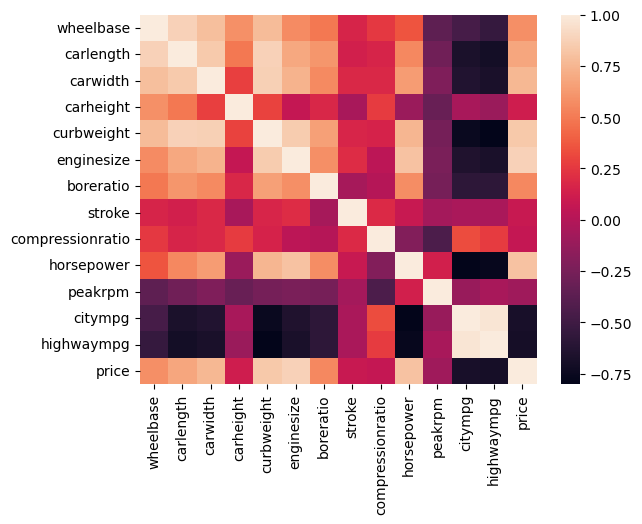

In [9]:
corr = data[num_col].corr()
ax = sns.heatmap(corr)

In [10]:
cm = sns.light_palette("blue", as_cmap=True)
pd.DataFrame(corr.price.sort_values(ascending = False)).style.background_gradient(cmap=cm)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


In [11]:
# data.drop(['stroke', 'compressionratio', 'peakrpm','carheight'], axis= 1, inplace = True)

num_col = data.drop(['symboling'], axis= 1).select_dtypes(include=np.number).columns

C:\Users\pc\AppData\Local\Temp\ipykernel_18808\1034416797.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


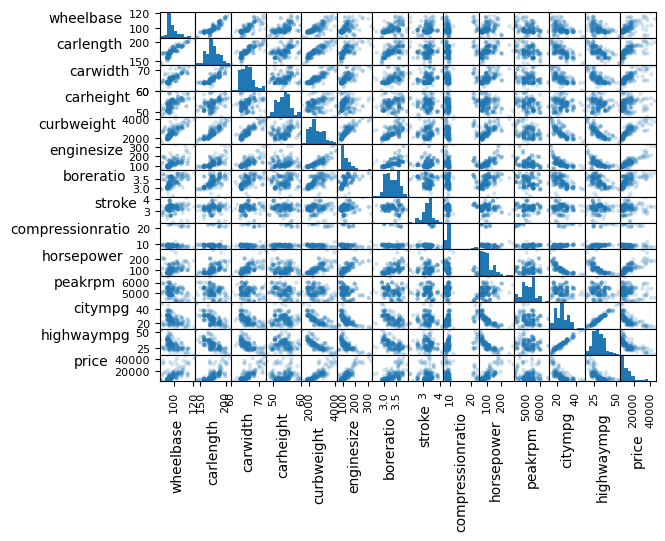

In [12]:
axes = pd.plotting.scatter_matrix(data[num_col], alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

<a id="2.2"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Categorical variables analysis</h3>

In [13]:
cat_col = list(data.select_dtypes(['object']).columns)
cat_col.append('symboling')
print(cat_col)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling']


In [15]:
for col in data[cat_col].columns:
    print(col)
    print(data[col].unique())
    print(len(data[col].unique()))
    print()

fueltype
['gas' 'diesel']
2

aspiration
['std' 'turbo']
2

doornumber
['two' 'four']
2

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
5

drivewheel
['rwd' 'fwd' '4wd']
3

enginelocation
['front' 'rear']
2

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
7

cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
7

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
8

symboling
[ 3  1  2  0 -1 -2]
6



In [18]:
def table_cat_num(df, cat_col, num_col):
    modalite = df[cat_col].unique()
    cat = []
    mean = []
    for i, mod in enumerate(modalite):
        cat.append(mod)
        mean.append(df[df[cat_col]== modalite[i]][num_col].mean())
        d = {'col1': cat, 'col2': mean}
    return pd.DataFrame(data = d)

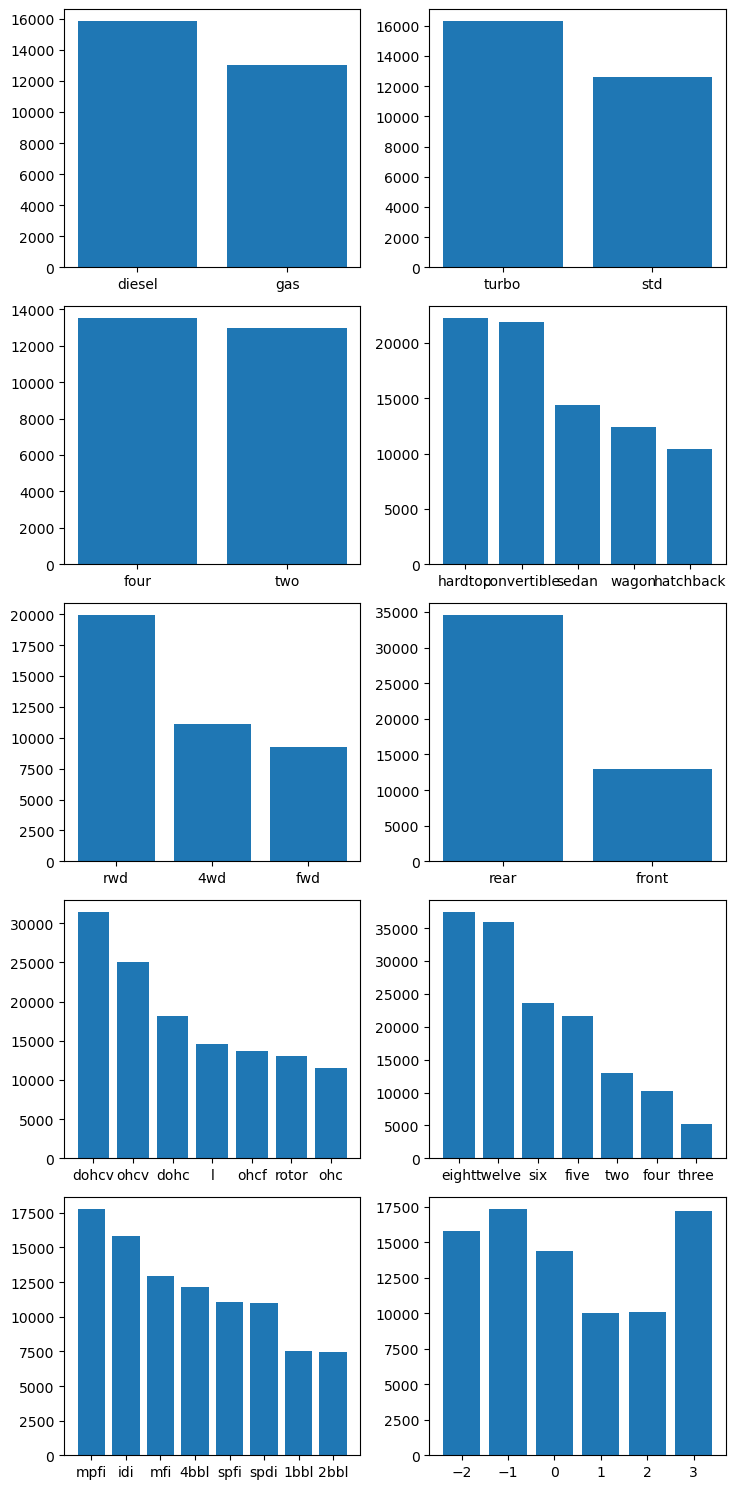

In [19]:
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
for i in range(len(cat_col)):
    dataa = table_cat_num(data, cat_col[i],
                          "price").sort_values(by="col2",ascending = False)
    plt.subplot(5,2,i+1)
    plt.bar(dataa['col1'], dataa['col2'])

plt.show()

<h2 style="color:#00C9FF">Classical encoding </h2>

In [20]:
cat_col_binary = ['fueltype', 'aspiration', 'enginelocation']

# for column in cat_col_binary:
#     data[column] = data[column].astype("category").cat.codes

In [21]:
# # doornumber
# codes = {'two':2, 'four':4}

# for i in range(data.shape[0]):
#     data["doornumber"][i] = codes[data["doornumber"][i]]


# # cylindernumber
# codes = {'four':4, 'six':6, 'five':5,  'three':3, 'twelve':12, 'two':2, 'eight':8}

# for i in range(data.shape[0]):
#     data["cylindernumber"][i] = codes[data["cylindernumber"][i]]

<h2 style="color:#00C9FF">One hot encoding</h2>

In [22]:
# one hot encoding

def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[feature_to_encode])
    res = pd.concat([df, dummies], axis=1)
    return(res)



data = encode_and_bind(data, cat_col)
# data.drop(['carbody','drivewheel', 'enginetype', 'fuelsystem'], axis = 1, inplace=True)

In [23]:
data.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
           'enginetype', 'cylindernumber', 'fuelsystem'], axis= 1, inplace = True)

In [24]:
cat_col = list(data.select_dtypes(['object']).columns)
print(cat_col)

[]


<a id="2.3"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">numerical data normalization </h3>

In [25]:
num_col = num_col.tolist()
num_col.remove("price")
scaler = preprocessing.StandardScaler().fit_transform(data[num_col])

data1 = data.copy()
data1[num_col] = scaler

price = preprocessing.MinMaxScaler().fit_transform(data.price.to_frame())

<a id="2.4"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Features selection </h3>

In [26]:
from sklearn.feature_selection import VarianceThreshold

filter_sonar = VarianceThreshold(threshold=0.02)

#Fit and transforming on train data
X = filter_sonar.fit_transform(data.drop('price', axis = 1))
X.shape, data.shape

((205, 43), (205, 54))

<a id="3"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;"> Modeling </h3>

In [27]:
Y = data["price"]
# X = data.drop(["price"], axis= 1)

In [28]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

<a id="3.1"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;"> Linear Regression </h3>

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
# print('train score = ',reg.score(X_train, y_train))
print('test score = ',reg.score(X_test, y_test))

test score =  0.9016114544753426


<a id="3.2"></a>
<h3 style="background-color:#00C9FF;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;"> XGBOOST regressor </h3>

In [30]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

model = XGBRegressor()

In [31]:
# X_train.drop('symboling', axis = 1, inplace = True)
# X_test.drop('symboling', axis = 1, inplace = True)

In [32]:
model.fit(X_train, y_train);

In [34]:
print('train score = ',model.score(X_train, y_train))

train score =  0.9991514822774796


In [33]:
print('test score = ',model.score(X_test, y_test))

test score =  0.9185164962444039
